<a href="https://colab.research.google.com/github/darvesh-sd/Copy-of-TPSessions.ipynb/blob/main/TP_4_No_2_Projet_Gutenberg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Install Required Libraries**

In [11]:
!pip install nltk wordcloud matplotlib requests beautifulsoup4 spacy plotly pandas
!python -m spacy download fr_core_news_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 76.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('fr_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


**Fetch and Clean the Text**

In [13]:
import requests
import re
import nltk
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')

# Fetch the text
def fetch_text(url):
    response = requests.get(url)
    response.raise_for_status()
    soup = BeautifulSoup(response.text, 'html.parser')
    return soup.get_text()

# Clean the text
def clean_text(text):
    start_pattern = "*** START OF THIS PROJECT GUTENBERG EBOOK"
    end_pattern = "*** END OF THIS PROJECT GUTENBERG EBOOK"
    start_idx = text.find(start_pattern)
    end_idx = text.find(end_pattern)
    if start_idx != -1 and end_idx != -1:
        text = text[start_idx + len(start_pattern):end_idx]
    text = text.lower()
    text = re.sub(r'[^a-zàâçéèêëîïôûùüÿñæœ\s]', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

url = "https://www.gutenberg.org/cache/epub/1522/pg1522.txt"
raw_text = fetch_text(url)
cleaned_text = clean_text(raw_text)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**Tokenization and Lemmatization**

In [14]:
import spacy

# Load the French spaCy model
nlp = spacy.load("fr_core_news_sm")

# Tokenize and lemmatize
def tokenize_and_lemmatize(text):
    doc = nlp(text)
    lemmatized_tokens = [token.lemma_ for token in doc if not token.is_stop and token.is_alpha]
    return lemmatized_tokens

tokens = tokenize_and_lemmatize(cleaned_text)


**Dynamic Word Cloud**

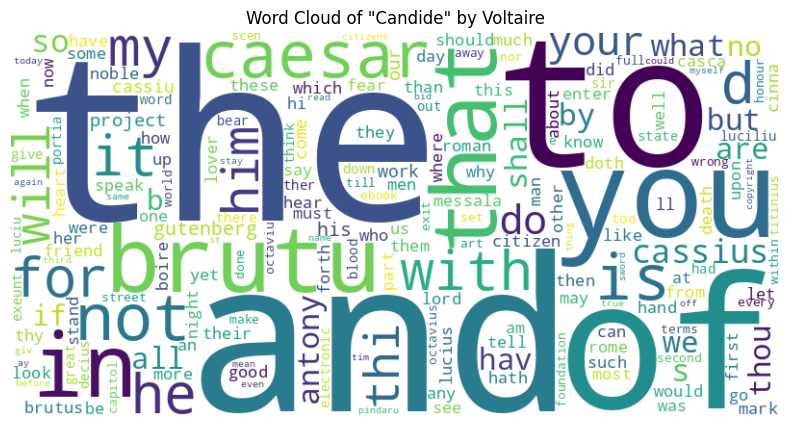

In [15]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter  # Ensure Counter is imported

# Generate and display the word cloud
def generate_wordcloud(tokens):
    word_freq = Counter(tokens)  # Count word frequencies
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        colormap='viridis'
    ).generate_from_frequencies(word_freq)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud of "Candide" by Voltaire')
    plt.show()

# Call the function to generate the word cloud
generate_wordcloud(tokens)


**Interactive Bar Chart with Plotly**

In [16]:
import pandas as pd
import plotly.express as px
from collections import Counter

# Get word frequencies
word_freq = Counter(tokens)
word_freq_df = pd.DataFrame(word_freq.items(), columns=["Word", "Frequency"]).sort_values(by="Frequency", ascending=False)

# Plot interactive bar chart
fig = px.bar(word_freq_df.head(15), x="Word", y="Frequency", title="Top 15 Most Frequent Words")
fig.update_layout(xaxis_title="Words", yaxis_title="Frequency", template="plotly_white")
fig.show()


**Sentiment Analysis and Themes**

In [17]:
!pip install transformers


Sentiment Analysis

In [18]:
from transformers import pipeline

# Load sentiment analysis pipeline
sentiment_analyzer = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")

# Analyze sentiment
sample_text = "Candide a vu beaucoup de malheur dans sa vie, mais il reste optimiste."
sentiment = sentiment_analyzer(sample_text)
print("Sentiment Analysis Result:", sentiment)


Sentiment Analysis Result: [{'label': '3 stars', 'score': 0.5364428758621216}]


**Topic Modeling**

In [19]:
!pip install gensim


**Perform Topic Modeling**

In [20]:
from gensim import corpora, models

# Create a dictionary and corpus
dictionary = corpora.Dictionary([tokens])
corpus = [dictionary.doc2bow([token]) for token in tokens]

# Apply LDA model
lda_model = models.LdaModel(corpus, num_topics=3, id2word=dictionary, passes=15)

# Print topics
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(f"Topic {topic[0]}: {topic[1]}")


Topic 0: 0.079*"and" + 0.066*"to" + 0.032*"not" + 0.031*"is" + 0.017*"s"
Topic 1: 0.035*"in" + 0.029*"gutenberg" + 0.026*"with" + 0.021*"for" + 0.020*"work"
Topic 2: 0.119*"the" + 0.073*"of" + 0.052*"you" + 0.032*"brutu" + 0.030*"that"
